<a href="https://colab.research.google.com/github/ghanalk1/Book-Recommendation-System/blob/main/Rough_brs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---



#***Book Recommendation System***


<img src="https://assets.rbl.ms/25570446/origin.jpg" width="600px" height="400px"/>


## **Problem Statement**

In a very general way, recommender systems are algorithms aimed at suggesting relevant
items to users (items being movies to watch, text to read, products to buy, or anything else
depending on industries).

Recommender systems are really critical in some industries as they can generate a huge
amount of income when they are efficient or also be a way to stand out significantly from
competitors. The main objective is to create a book recommendation system for users.

**Content**


The Book-Crossing dataset comprises 3 files.

● Users

Contains the users. Note that user IDs (User-ID) have been anonymized and map to
integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

● Books

Books are identified by their respective ISBN. Invalid ISBNs have already been removed
from the dataset. Moreover, some content-based information is given (Book-Title,
Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web
Services. Note that in the case of several authors, only the first is provided. URLs linking
to cover images are also given, appearing in three different flavors (Image-URL-S,
Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the
Amazon website.

● Ratings

Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit,
expressed by 0.

In [1]:
#importing the required libraries
#Data wrangling
import numpy as np
import pandas as pd
#data visualization
import seaborn as sns
import matplotlib.pyplot as plt
#To create wordcloud
from PIL import Image
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS
plt.rcParams["figure.figsize"] = (8,8)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#loading the required datasets
books_df = pd.read_csv('/content/drive/MyDrive/dat/Books.csv',low_memory=False)
rating_df = pd.read_csv('/content/drive/MyDrive/dat/Ratings.csv',low_memory=False)
users_df = pd.read_csv('/content/drive/MyDrive/dat/Users.csv',low_memory=False)

## **Taking a look at datasets**

In [4]:
users_df.head(3)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN


In [5]:
books_df.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


In [6]:
rating_df.head(3)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


In [7]:
# shapes of all the datasets
print('Shape of Users: {}, Books: {} and Ratings: {}'.format(users_df.shape, books_df.shape, rating_df.shape))

Shape of Users: (278858, 3), Books: (271360, 8) and Ratings: (1149780, 3)


## **Books data**



---


###**Data Description**

Books are identified by their respective ISBN. Invalid ISBNs have already been removed
from the dataset. Moreover, some content-based information is given (Book-Title,
Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web
Services. Note that in the case of several authors, only the first is provided. URLs linking
to cover images are also given, appearing in three different flavors (Image-URL-S,
Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the
Amazon website.


In [8]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [9]:
print('This shape of Books datasheet is : ',books_df.shape)
# print('='*30)
# print('This shape of Ratings datasheet is : ',df2.shape)
# print('='*30)
# print('This shape of Users datasheet is : ',df3.shape)

This shape of Books datasheet is :  (271360, 8)


In [10]:
print(books_df.info())
# print('='*40)
# print(df2.info())
# print('='*40)
# print(df3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
None


In [11]:
books_df.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,118,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,17627,7535,2,2,2


In [12]:
# Missing value percentage
print(books_df.isnull().sum()/len(books_df)*100)

ISBN                   0.000000
Book-Title             0.000000
Book-Author            0.000369
Year-Of-Publication    0.000000
Publisher              0.000737
Image-URL-S            0.000000
Image-URL-M            0.000000
Image-URL-L            0.001106
dtype: float64


In [13]:
# checking for data in missing info columns
books_df['Image-URL-L'].value_counts()

http://images.amazon.com/images/P/225307649X.01.LZZZZZZZ.jpg    2
http://images.amazon.com/images/P/044021145X.01.LZZZZZZZ.jpg    2
http://images.amazon.com/images/P/044991089X.01.LZZZZZZZ.jpg    2
http://images.amazon.com/images/P/039552105X.01.LZZZZZZZ.jpg    2
http://images.amazon.com/images/P/014062063X.01.LZZZZZZZ.jpg    2
                                                               ..
http://images.amazon.com/images/P/1860461050.01.LZZZZZZZ.jpg    1
http://images.amazon.com/images/P/0553213067.01.LZZZZZZZ.jpg    1
http://images.amazon.com/images/P/156971634X.01.LZZZZZZZ.jpg    1
http://images.amazon.com/images/P/349223674X.01.LZZZZZZZ.jpg    1
http://images.amazon.com/images/P/0767409752.01.LZZZZZZZ.jpg    1
Name: Image-URL-L, Length: 271041, dtype: int64

In [14]:
books_df['Book-Author'].value_counts()

Agatha Christie         632
William Shakespeare     567
Stephen King            524
Ann M. Martin           423
Carolyn Keene           373
                       ... 
Linda Jackson             1
Artiste C. Arthur         1
Emily Pearl Kingsley      1
Jean Cassels              1
Christopher  Biffle       1
Name: Book-Author, Length: 102023, dtype: int64

In [15]:
books_df['Publisher'].value_counts()

Harlequin                  7535
Silhouette                 4220
Pocket                     3905
Ballantine Books           3783
Bantam Books               3646
                           ... 
Hannover House                1
Amber Quill Press, LLC.       1
Lunchbox Press                1
Ugly Town                     1
Connaught                     1
Name: Publisher, Length: 16807, dtype: int64

In [16]:
# filling null value in book author
books_df[books_df['Book-Author'].isna()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


In [17]:
books_df.loc[187689, 'Book-Author'] = 'Larissa Anne Downes'

In [18]:
# filling null values in publisher
books_df[books_df['Publisher'].isna()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


In [19]:
books_df.loc[128890, 'Publisher'] = 'Mundania Press LLC'
books_df.loc[129037, 'Publisher'] = 'Bantam'

In [20]:
# filling null values in image url l
books_df['Image-URL-L'].fillna(value=books_df['Image-URL-L'].mode()[0], inplace=True)

In [21]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271360 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271360 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271360 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


## **Users Data**


---




###**Data description**

Contains the users. Note that user IDs (User-ID) have been anonymized and map to
integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

In [22]:
#displaying the top 10 and bottom 10 rows of the dataframe
pd.concat([users_df.head(10),users_df.tail(10)],axis=0)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
5,6,"santa monica, california, usa",61.0
6,7,"washington, dc, usa",NaN
7,8,"timmins, ontario, canada",NaN
8,9,"germantown, tennessee, usa",NaN
9,10,"albacete, wisconsin, spain",26.0


In [23]:
#inspecting the columns in users_df
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


* There are records of 278858 users in this dataframe.There are 3 columns in this dataframe.
* The 'Age' column has null values

In [24]:
#Percentage of missing values in users_df
print(users_df.isnull().sum()/len(users_df)*100)

User-ID      0.000000
Location     0.000000
Age         39.719857
dtype: float64


* The 39.7% of values in the 'Age' column are missing/NaN values

In [25]:
#Checking for duplicates in users_df
users_df[users_df['User-ID'].duplicated()].sum()

User-ID     0.0
Location    0.0
Age         0.0
dtype: float64

In [26]:
#summarizing data in 'Age' column
users_df['Age'].describe()

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64

* The maximum value in the 'Age' column is 244. This is certainly an outlier.

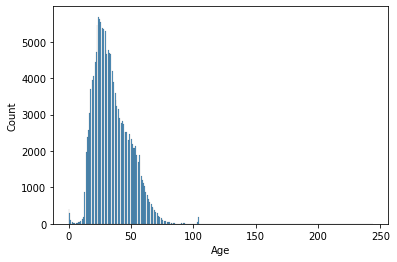

In [27]:
#Histogram showing distribution of ages
sns.histplot(x='Age',data=users_df)

* Most of the users are from the age group 20-50
* It is highly unlikely to have users under the age of 5 and above 100.The peaks near 0 and 100 indicates that there are some outlier values in the 'Age' column

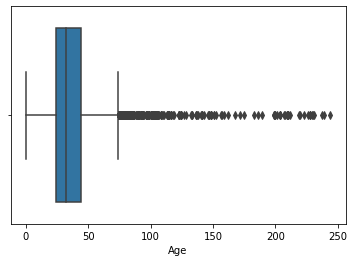

In [28]:
#boxplot
sns.boxplot(x='Age',data=users_df)

* Most of the users have age below 100. 





It is highly unlikely to have users of age above 100 and below 4 in this case.So,let's replace these rows with median value of age

In [29]:
#replacing the outliers in 'Age' with median value
users_df[(users_df['Age']>100)|(users_df['Age']<4)]=np.nan

In [30]:
#replacing missing values with the median age
users_df['Age'].fillna(users_df['Age'].median(),inplace=True)

In [31]:
#percentage of missing values in 'Age' column
(users_df['Age'].isnull().sum()/len(users_df))*100

0.0

In [32]:
#number of unique values in 'Location'
users_df['Location'].nunique()

57112

In [33]:
#extracting the country names from users_df
for i in users_df:
    users_df['Country']=users_df.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')

In [34]:
#Displaying the country names
set(users_df['Country'])

{'',
 '01776',
 '02458',
 '19104',
 '23232',
 '30064',
 '85021',
 '87510',
 '_ brasil',
 'a',
 'aaa',
 'adsgfdr',
 'afghanistan',
 'ahrensburg',
 'alachua',
 'albania',
 'alderney',
 'algeria',
 'algérie',
 'allen',
 'ama lurra',
 'america',
 'american samoa',
 'andorra',
 'angola',
 'antarctica',
 'aotearoa',
 'argentina',
 'armenia',
 'aroostook',
 'aruba',
 'asturies',
 'auckland',
 'austbritania',
 'australia',
 'australii',
 'austria',
 'autralia',
 'az',
 'azerbaijan',
 'bademn würtemberg',
 'bahamas',
 'bahrain',
 'baltimore',
 'bangladesh',
 'barbados',
 'basilicata',
 'basque country',
 'bavaria',
 'baxter',
 'bbbzzzzz',
 'belarus',
 'belgi',
 'belgique',
 'belgium',
 'belize',
 'bell',
 'benin',
 'berguedà',
 'bermuda',
 'bernalillo',
 'bfe',
 'bhutan',
 'bih',
 'bkk',
 'bladen',
 'bolivia',
 'bosnia',
 'botswana',
 'brasil',
 'brazil',
 'brunei',
 'brunei darussalam',
 'bucks',
 'bulgaria',
 'buncombe',
 'burkina faso',
 'burkinafasu',
 'burlington',
 'burma',
 'butler',
 'c

In [35]:
#correcting the mispelled country names
users_df.loc[users_df['Country'].isin(['australii','autralia','western australia']), 'Country'] = 'australia'
users_df.loc[users_df['Country'].isin(['unite states','01776','02458','19104','23232','30064','85021','87510','united sates','united staes','united state','united statea','united stated','america'
                                      'united stated of america','united states','united states of america','us','us of a','us virgin islands',
                                      'usa  canada','usa currently living in england','uusa','usaa','wonderful usa','california','orange co']), 'Country'] = 'usa'
users_df.loc[users_df['Country'].isin(['united kindgdom', 'united kindgonm','united kingdom','u k']), 'Country'] = 'uk'  
users_df.loc[users_df['Country'].isin(['the philippines', 'philippines', 'philippinies', 'phillipines', 'phils', 'phippines']), 'Country'] = 'philippines'                                      
users_df.loc[users_df['Country'].isin(['','xxxxxx','universe','nowhere','x','y','a','öð¹ú','the','unknown',np.nan,'n/a','aaa','z','somewherein space']), 'Country'] = 'others'
users_df.loc[users_df['Country'].isin([ 'italia','italien','itlay']), 'Country'] = 'italy'
users_df.loc[users_df['Country'].isin([ ' china öð¹ú','chinaöð¹ú','chian']), 'Country'] = 'china'
users_df['Country'].replace([ 'the gambia','the netherlands','geermany','srilanka','saudia arabia','brasil','_ brasil','indiai','malaysian','hongkong','russian federation'], 
                            ['gambia','netherlands','germany','sri lanka','saudi arabia','brazil','brazil','india','malaysia','hong kong','russia'],inplace=True)
 


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

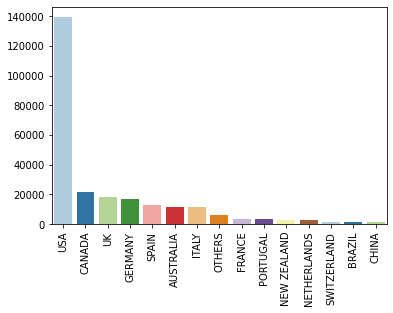

In [36]:
#Countries with maximumn number of users
top10=users_df['Country'].value_counts().nlargest(15)
sns.barplot(x=top10.index.str.upper(),y=top10.values,palette='Paired')
plt.xticks(rotation=90)

## **Ratings data**


---



### **Data description**

Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit,
expressed by 0.

In [37]:
#displaying the first 5 rows
rating_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [38]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [39]:
# checking null values
rating_df.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [40]:
# checking for unique user ids and isbn values
print('Number of unique user ids is {} and ISBN no. is {}'.format(rating_df['User-ID'].nunique(), rating_df['ISBN'].nunique()))

Number of unique user ids is 105283 and ISBN no. is 340556




> *This means that many users are buying multiple books. Also some books are really famous and hence are bought by multiple users.*



In [41]:
# checking for duplicates
rating_df[rating_df.duplicated()].sum()

User-ID        0.0
ISBN           0.0
Book-Rating    0.0
dtype: float64

In [42]:
# making all the ISBN no. uppercase
rating_df['ISBN'].apply(lambda x: x.upper())

0           034545104X
1           0155061224
2           0446520802
3           052165615X
4           0521795028
              ...     
1149775     1563526298
1149776     0679447156
1149777     0515107662
1149778     0590442449
1149779    05162443314
Name: ISBN, Length: 1149780, dtype: object

In [43]:
# lets see if all the books in rating_df are also in books_df
rating_df_new = rating_df[rating_df['ISBN'].isin(books_df['ISBN'])]

In [44]:
print('Shape of rating_df: {} and rating_df_new: {}'.format(rating_df.shape, rating_df_new.shape))

Shape of rating_df: (1149780, 3) and rating_df_new: (1031136, 3)


In [45]:
# book ratings
rating_df_new['Book-Rating'].value_counts().reset_index()

,index,Book-Rating
0,0,647294
1,8,91804
2,10,71225
3,7,66402
4,9,60778
5,5,45355
6,6,31687
7,4,7617
8,3,5118
9,2,2375




> *We can see for explicit ratings that rating 8 is recieved by most number of books followed by rating 10.*
> *There are 647294 implicitely rated books.*



In [46]:
# most popular books
rating_df_new.groupby('ISBN')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False)[:10]

,ISBN,Book-Rating
215952,0971880107,2502
38570,0316666343,1295
70798,0385504209,883
7344,0060928336,732
32370,0312195516,723
87397,044023722X,647
21342,0142001740,615
145042,067976402X,614
133142,0671027360,586
93847,0446672211,585




> *but this contains both explicit and implicit rating, so we need to seperate them to get better idea.*



In [47]:
explicit_rating = rating_df_new[rating_df_new['Book-Rating'] != 0]
implicit_rating = rating_df_new[rating_df_new['Book-Rating'] == 0]
print('Shape of explicit rating: {} and implicit rating: {}'.format(explicit_rating.shape, implicit_rating.shape))

Shape of explicit rating: (383842, 3) and implicit rating: (647294, 3)


In [48]:
# most popular explicitely rated books
explicit_rating.groupby('ISBN')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False)[:10]

,ISBN,Book-Rating
21945,0316666343,707
117745,0971880107,581
38819,0385504209,487
18058,0312195516,383
4131,0060928336,320
68898,059035342X,313
12325,0142001740,307
51799,0446672211,295
47986,044023722X,281
57625,0452282152,278


In [49]:
# getting the book names corersponding to these ISBNs
isbn_nums = ['0316666343', '0971880107', '0385504209', '0312195516', '0060928336']
books_df[books_df['ISBN'].isin(isbn_nums)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
26,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
408,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
522,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...
748,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
1105,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...




> *therefore the most popular book is 'The Lovely Bones: A Novel'*



## **Merging Datasets**

---






In [50]:
# for the rating dataset, we are only taking the explicit rating dataset

df = pd.merge(books_df, explicit_rating, on='ISBN', how='inner')
df = pd.merge(df, users_df, on='User-ID', how='inner')

In [51]:
df.shape

(382398, 13)

In [52]:
df.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age,Country
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",32.0,canada
1,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,8,5,"timmins, ontario, canada",32.0,canada
2,0887841740,The Middle Stories,Sheila Heti,2004,House of Anansi Press,http://images.amazon.com/images/P/0887841740.0...,http://images.amazon.com/images/P/0887841740.0...,http://images.amazon.com/images/P/0887841740.0...,8,5,"timmins, ontario, canada",32.0,canada


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382398 entries, 0 to 382397
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 382398 non-null  object 
 1   Book-Title           382398 non-null  object 
 2   Book-Author          382398 non-null  object 
 3   Year-Of-Publication  382398 non-null  object 
 4   Publisher            382398 non-null  object 
 5   Image-URL-S          382398 non-null  object 
 6   Image-URL-M          382398 non-null  object 
 7   Image-URL-L          382398 non-null  object 
 8   User-ID              382398 non-null  int64  
 9   Book-Rating          382398 non-null  int64  
 10  Location             382398 non-null  object 
 11  Age                  382398 non-null  float64
 12  Country              382398 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 40.8+ MB


In [54]:
# the 'Year of publication' dtype is object which seems weird

df['Year-Of-Publication'].value_counts()

2002                 37824
2001                 32206
2003                 29025
1999                 28993
2000                 28208
                     ...  
2006                     1
DK Publishing Inc        1
2011                     1
1376                     1
1906                     1
Name: Year-Of-Publication, Length: 106, dtype: int64



> *one entry for 'year of publication' is DK publishing inc.*



In [55]:
# correcting this error
df[df['Year-Of-Publication'] == 'DK Publishing Inc']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age,Country
299049,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/000225669X.0...,227771,7,"savion, n/a, israel",19.0,israel


In [56]:
# on searching for this book we came to know about its author
df.loc[299049, 'Book-Author'] = 'Cynthia O Neill'
df.loc[299049, 'Year-Of-Publication'] = 2000
df.loc[299049, 'Publisher'] = 'DK Publishing Inc'

In [57]:
df.loc[299049, :]

ISBN                                                          078946697X
Book-Title             DK Readers: Creating the X-Men, How It All Beg...
Book-Author                                              Cynthia O Neill
Year-Of-Publication                                                 2000
Publisher                                              DK Publishing Inc
Image-URL-S            http://images.amazon.com/images/P/078946697X.0...
Image-URL-M            http://images.amazon.com/images/P/078946697X.0...
Image-URL-L            http://images.amazon.com/images/P/000225669X.0...
User-ID                                                           227771
Book-Rating                                                            7
Location                                             savion, n/a, israel
Age                                                                 19.0
Country                                                           israel
Name: 299049, dtype: object

In [58]:
# changing dtype of year of publication
df['Year-Of-Publication'] = df['Year-Of-Publication'].astype(int)

In [59]:
# something is off about years of publication like:
df[(df['Year-Of-Publication'] > 0) & (df['Year-Of-Publication'] < 1800)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age,Country
203637,9643112136,Dalan-i bihisht (Dastan-i Irani),Nazi Safavi,1378,Intisharat-i Quqnus,http://images.amazon.com/images/P/9643112136.0...,http://images.amazon.com/images/P/9643112136.0...,http://images.amazon.com/images/P/9643112136.0...,116599,10,"tehran, tehran, iran",29.0,iran
341866,964442011X,Tasht-i khun,IsmaÂ°il Fasih,1376,Nashr-i Alburz,http://images.amazon.com/images/P/964442011X.0...,http://images.amazon.com/images/P/964442011X.0...,http://images.amazon.com/images/P/964442011X.0...,170186,4,"tehran, n/a, iran",27.0,iran


In [60]:
# fixing them
df.loc[203637, 'Year-Of-Publication'] = 2010
df.loc[341866, 'Year-Of-Publication'] = 1991

In [61]:
# many values of year of publication are 0
df[df['Year-Of-Publication'] == 0]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age,Country
76,0571197639,Poisonwood Bible Edition Uk,Barbara Kingsolver,0,Faber Faber Inc,http://images.amazon.com/images/P/0571197639.0...,http://images.amazon.com/images/P/0571197639.0...,http://images.amazon.com/images/P/0571197639.0...,11676,6,"n/a, n/a, n/a",32.0,others
139,0590021117,Little House On the Prairie,Laura Ingall Wilder,0,Scholastic Inc,http://images.amazon.com/images/P/0590021117.0...,http://images.amazon.com/images/P/0590021117.0...,http://images.amazon.com/images/P/0590021117.0...,11676,8,"n/a, n/a, n/a",32.0,others
159,2070362388,Ravage,Rene Barjavel,0,Gallimard French,http://images.amazon.com/images/P/2070362388.0...,http://images.amazon.com/images/P/2070362388.0...,http://images.amazon.com/images/P/2070362388.0...,11676,7,"n/a, n/a, n/a",32.0,others
174,0718144538,Shattered Uk,Dick Francis,0,Michael Joseph Ltd,http://images.amazon.com/images/P/0718144538.0...,http://images.amazon.com/images/P/0718144538.0...,http://images.amazon.com/images/P/0718144538.0...,11676,6,"n/a, n/a, n/a",32.0,others
193,0753804700,Reader,Bernhard Schlink,0,Phoenix Books,http://images.amazon.com/images/P/0753804700.0...,http://images.amazon.com/images/P/0753804700.0...,http://images.amazon.com/images/P/0753804700.0...,11676,6,"n/a, n/a, n/a",32.0,others
...,...,...,...,...,...,...,...,...,...,...,...,...,...
382152,8804409118,Nuvola Di Smog Formica Argentina,Italo Calvino,0,Oscar Italian,http://images.amazon.com/images/P/8804409118.0...,http://images.amazon.com/images/P/8804409118.0...,http://images.amazon.com/images/P/8804409118.0...,215417,9,"trento, trentino alto adige, italy",22.0,italy
382173,0517209039,Dubliners a Portrait of the Artist As A,James Joyce,0,Random House~trade,http://images.amazon.com/images/P/0517209039.0...,http://images.amazon.com/images/P/0517209039.0...,http://images.amazon.com/images/P/0517209039.0...,217349,8,"bad durkheim, rheinland-pfalz, germany",25.0,germany
382231,0586089268,Works of Genius,Richard Marek,0,Hunter Publishing+inc,http://images.amazon.com/images/P/0586089268.0...,http://images.amazon.com/images/P/0586089268.0...,http://images.amazon.com/images/P/0586089268.0...,231342,6,"heckington, england, united kingdom",32.0,uk
382292,8807840146,Next,Baricco,0,Feltrinelli,http://images.amazon.com/images/P/8807840146.0...,http://images.amazon.com/images/P/8807840146.0...,http://images.amazon.com/images/P/8807840146.0...,235944,8,"milano, lombardia, italy",32.0,italy


## **EDA**

### **Univariate analysis**

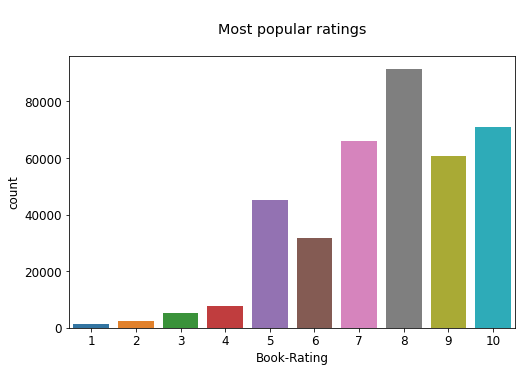

In [62]:
# most popular rating
plt.figure(figsize=[8,5])
plt.rc('font', size=12)
plt.title('\nMost popular ratings\n')
sns.countplot(data=df, x='Book-Rating')

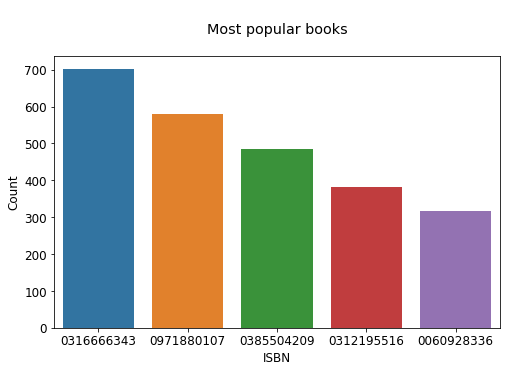

In [63]:
# top 5 most popular books

popular = df.groupby('ISBN')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False)[:5]
popular.columns = ['ISBN', 'Count']

plt.figure(figsize=[8, 5])
plt.rc('font', size=12)
plt.title('\nMost popular books\n')
sns.barplot(data=popular, x='ISBN', y='Count')

In [64]:
# distribution of year of publication
# will do after clearing some doubts

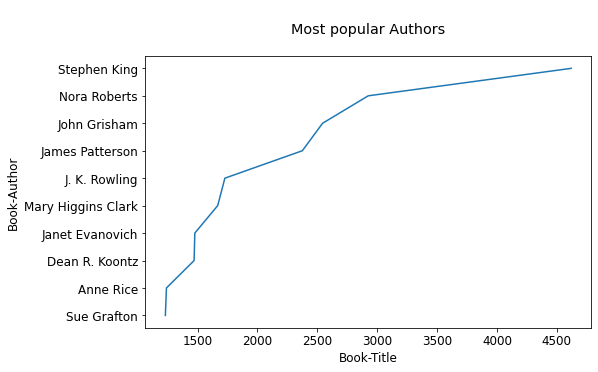

In [65]:
# most popular book authors
author = df.groupby('Book-Author')['Book-Title'].count().reset_index().sort_values(by='Book-Title', ascending=False)[:10]
plt.figure(figsize=[8, 5])
plt.rc('font', size=12)
plt.title('\nMost popular Authors\n')
sns.lineplot(data=author, y='Book-Author', x='Book-Title')

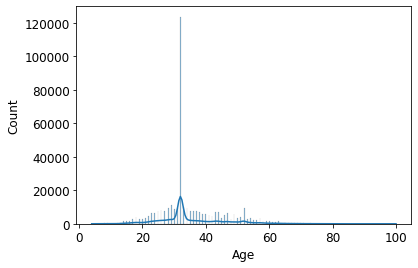

In [66]:
# distribution of age
sns.histplot(data=df, x='Age', kde=True)

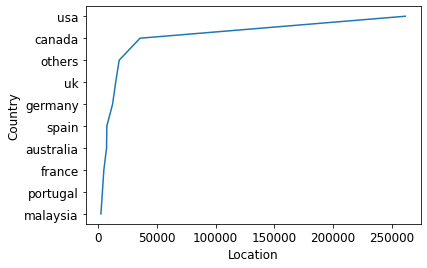

In [67]:
# countries with most readers
countries = df.groupby('Country')['Location'].count().reset_index().sort_values(by='Location', ascending=False)[:10]
sns.lineplot(data=countries, y='Country', x='Location')

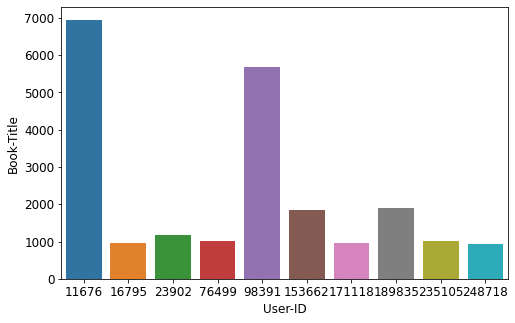

In [68]:
# plotting most busy users
users = df.groupby('User-ID')['Book-Title'].count().reset_index().sort_values(by='Book-Title', ascending=False)[:10]
plt.figure(figsize=[8, 5])
sns.barplot(data=users, x='User-ID', y='Book-Title')

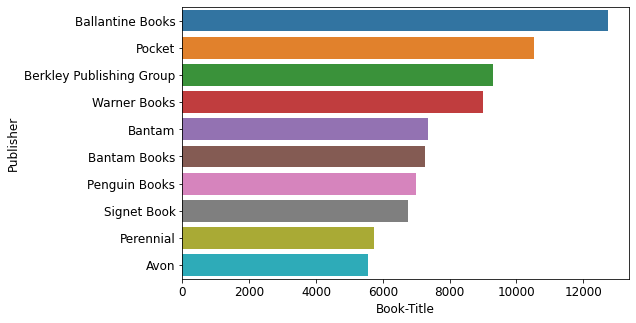

In [69]:
# Publisher with most books

publishers = df.groupby('Publisher')['Book-Title'].count().reset_index().sort_values(by='Book-Title', ascending=False)[:10]
plt.figure(figsize=[8, 5])
sns.barplot(data=publishers, x='Book-Title', y='Publisher')

In [70]:
df.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age,Country
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",32.0,canada
1,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,8,5,"timmins, ontario, canada",32.0,canada


## **Memory Based Collaborative Recommendation System**

### **KNN Based Algorithm**

In [75]:
# we kept running into memory issues, so decided to reduce some data by filtering things out
# focussing on users with atleast 3 ratings and top 10% most frequently rated books
required_ratings = 3

user = df['User-ID'].value_counts()
user_list = user[user >= required_ratings].index.to_list()
filter_df = df[df['User-ID'].isin(user_list)]

print('Number of users with ratings greater than equal to 3 are: {}'.format(filter_df.shape[0]))

Number of users with ratings greater than equal to 3 are: 326045


In [76]:
# top 10% most frequently rated books
required = len(filter_df.ISBN.unique()) * 0.1

user_list = filter_df['ISBN'].value_counts().head(int(required)).index.to_list()
filter_df = filter_df[filter_df['ISBN'].isin(user_list)]

print('Number of top 10% users are: {}'.format(filter_df.shape[0]))

Number of top 10% users are: 160067


In [77]:
# shape of final dataset
filter_df.shape

(160067, 13)

In [78]:
# creating a pivot table
table = filter_df.pivot_table(columns='User-ID', index='Book-Title', values='Book-Rating')
table

User-ID,8,17,53,92,99,114,165,232,242,243,...,278637,278641,278648,278663,278694,278773,278832,278843,278851,278854
Book-Title,,,,,,,,,,,,,,,,,,,,,
"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Q-Space (Star Trek The Next Generation, Book 47)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
!Yo!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Salem's Lot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
iI Paradiso Degli Orchi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
murder@maggody.com : An Arly Hanks Mystery (Arly Hanks Mysteries (Paperback)),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
# filling null values
table.fillna(0, inplace=True)
table

User-ID,8,17,53,92,99,114,165,232,242,243,...,278637,278641,278648,278663,278694,278773,278832,278843,278851,278854
Book-Title,,,,,,,,,,,,,,,,,,,,,
"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Q-Space (Star Trek The Next Generation, Book 47)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
!Yo!,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Salem's Lot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iI Paradiso Degli Orchi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
murder@maggody.com : An Arly Hanks Mystery (Arly Hanks Mysteries (Paperback)),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
# converting to sparse matrix
from scipy.sparse import csr_matrix

sparse = csr_matrix(table)
sparse

<12207x18485 sparse matrix of type '<class 'numpy.float64'>'
	with 159587 stored elements in Compressed Sparse Row format>

In [81]:
#Creating an instance of KNN
from sklearn.neighbors import NearestNeighbors

model = NearestNeighbors(algorithm='brute')
model.fit(sparse)

NearestNeighbors(algorithm='brute')

In [98]:
# function to get recommendations

def get_recommendations(name, n):

  # getting book id
  book_id= np.where(table.index==name)[0][0]

  # distances and suggestions based on similarity
  distances, suggestions = model.kneighbors(table.iloc[book_id, :].values.reshape(1,-1),n_neighbors=n+1)
  suggestions = suggestions.flatten().tolist()

  for i in range(len(suggestions)):
    # if book is same as input
    if i==0:
      print('The top {} Recommended books for {} are:\n'.format(n, name))
    else:
      print(table.index[suggestions[i]])
  return

In [99]:
get_recommendations('Harry Potter and the Chamber of Secrets (Book 2)', 10)

The top 10 Recommended books for Harry Potter and the Chamber of Secrets (Book 2) are:

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Book 1)
Dragons of a Lost Star (The War of Souls, Volume II)
Dr. Seuss's A B C (I Can Read It All by Myself Beginner Books)
The Second Generation
J. K. Rowling: The Wizard Behind Harry Potter
Lover Beware
Dragonquest Achille Cover
Tears Of The Renegade


### **KNN with cosine metric**

In [103]:
#Creating an instance of KNN with cosine metric

model_cosine = NearestNeighbors(metric='cosine', algorithm='brute')
model_cosine.fit(sparse)

NearestNeighbors(algorithm='brute', metric='cosine')

In [104]:
# function to get recommendations

def get_cosine_recommendations(name, n):

  print('Cosine Similarity based recommendations.\n')

  # distances and indices based on similarity
  distances, indices = model_cosine.kneighbors(table.loc[name].values.reshape(1, -1), n_neighbors = n+1)

  for i in range(len(distances.flatten())):
    if i==0:
      print('The top {} Recommended books for {} are:\n'.format(n, name))
    else:
      print(table.index[indices.flatten()[i]])
  return

In [105]:
get_cosine_recommendations('Harry Potter and the Chamber of Secrets (Book 2)', 10)

Cosine Similarity based recommendations.

The top 10 Recommended books for Harry Potter and the Chamber of Secrets (Book 2) are:

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Harry Potter and the Order of the Phoenix (Book 5)
The Fellowship of the Ring (The Lord of the Rings, Part 1)
The Hobbit: or There and Back Again
Dragons of a Lost Star (The War of Souls, Volume II)
Dr. Seuss's A B C (I Can Read It All by Myself Beginner Books)
The Second Generation
